In [16]:

from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (12, 6)

print("Setup complete ✅")


Setup complete ✅


In [17]:
# Project root: search upwards until finding the folder "Project_AirQuality"
cwd = Path.cwd()
project_root = next((p for p in [cwd, *cwd.parents] if p.name == "Project_AirQuality"), None)

if project_root is None:
    raise FileNotFoundError(
        "Project root folder 'Project_AirQuality' not found. "
        "Open VSCode from the correct folder (Project_AirQuality) and retry."
    )

DATA_PATH = project_root / "data" / "processed" / "air_quality_clean_base.csv"
FIGURES_DIR = project_root / "figures"
FIGURES_DIR.mkdir(exist_ok=True)

DATA_PATH


PosixPath('/home/kevin/Projects/DataPortfolio/Project_AirQuality/data/processed/air_quality_clean_base.csv')

In [18]:
df = pd.read_csv(DATA_PATH)

# Basic checks
display(df.head())
print("Shape:", df.shape)

# Ensure Date is datetime (for time-series plots)
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
print("Date dtype:", df["Date"].dtype)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,NaN,NaN


Shape: (29531, 15)
Date dtype: datetime64[ns]


In [19]:
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df)).round(3)

missing_report = pd.DataFrame({
    "missing_count": missing,
    "missing_pct": missing_pct
}).query("missing_count > 0")

display(missing_report.head(12))


,missing_count,missing_pct
PM10,11140,0.377
NH3,10328,0.350
Toluene,8041,0.272
Benzene,5623,0.190
AQI,4681,0.159
AQI_Bucket,4681,0.159
PM2.5,4598,0.156
NOx,4185,0.142
O3,4022,0.136
SO2,3854,0.131


In [20]:
# Aggregate AQI by date (daily average)
aqi_ts = (
    df.dropna(subset=["AQI"])
      .groupby("Date", as_index=False)["AQI"]
      .mean()
)

aqi_ts.head()


,Date,AQI
0,2015-01-01,472.0
1,2015-01-02,454.0
2,2015-01-03,143.0
3,2015-01-04,319.0
4,2015-01-05,325.0


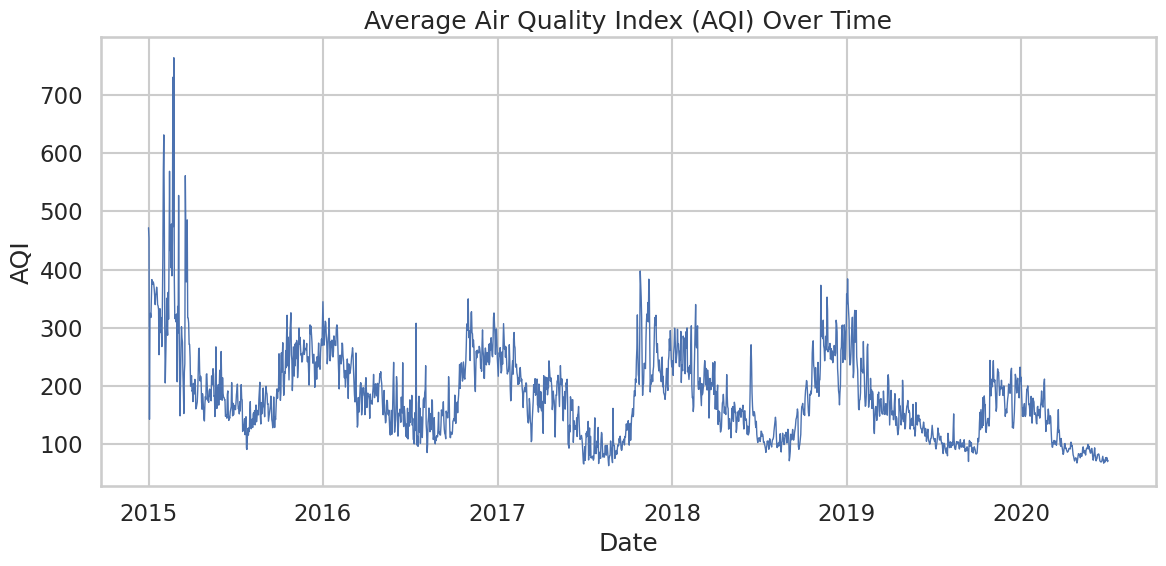

In [21]:
plt.figure()
plt.plot(aqi_ts["Date"], aqi_ts["AQI"], linewidth=1)

plt.title("Average Air Quality Index (AQI) Over Time")
plt.xlabel("Date")
plt.ylabel("AQI")

plt.tight_layout()
plt.show()


In [22]:
output_path = FIGURES_DIR / "aqi_time_series.png"
plt.figure()
plt.plot(aqi_ts["Date"], aqi_ts["AQI"], linewidth=1)
plt.title("Average Air Quality Index (AQI) Over Time")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.tight_layout()
plt.savefig(output_path, dpi=150)
plt.close()

output_path


PosixPath('/home/kevin/Projects/DataPortfolio/Project_AirQuality/figures/aqi_time_series.png')

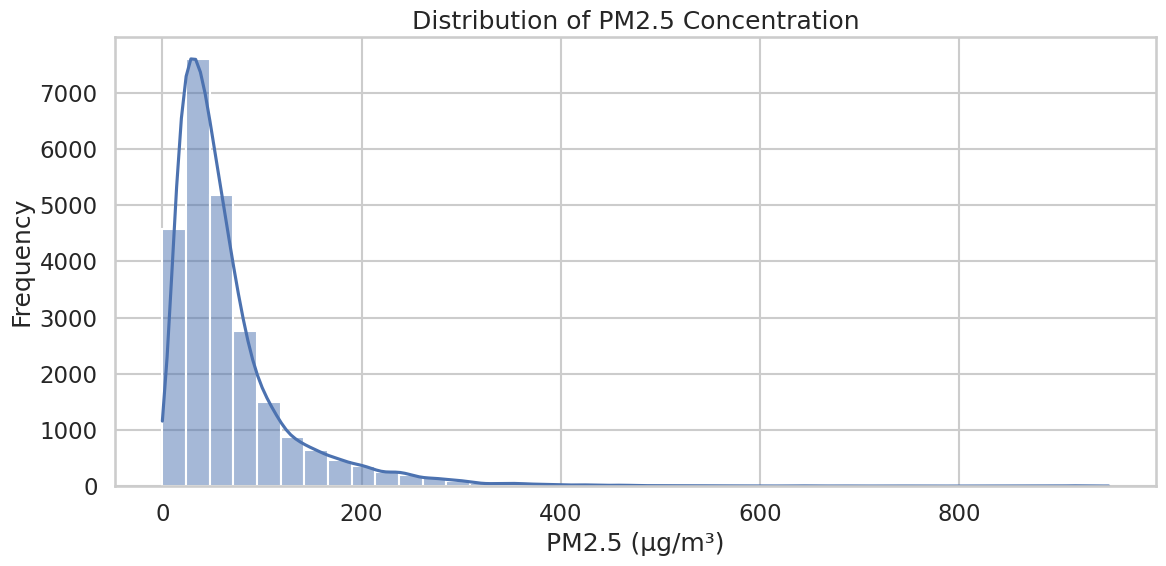

In [24]:
# ==============================
# Visualización 2: Distribución de PM2.5
# ==============================

plt.figure()
sns.histplot(
    data=df,
    x="PM2.5",
    bins=40,
    kde=True
)

plt.title("Distribution of PM2.5 Concentration")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [25]:
# Seleccionar las 10 ciudades con más registros de PM2.5
top_cities = (
    df.dropna(subset=["PM2.5"])
      .groupby("City")
      .size()
      .sort_values(ascending=False)
      .head(10)
      .index
)

df_top_cities = df[df["City"].isin(top_cities)]


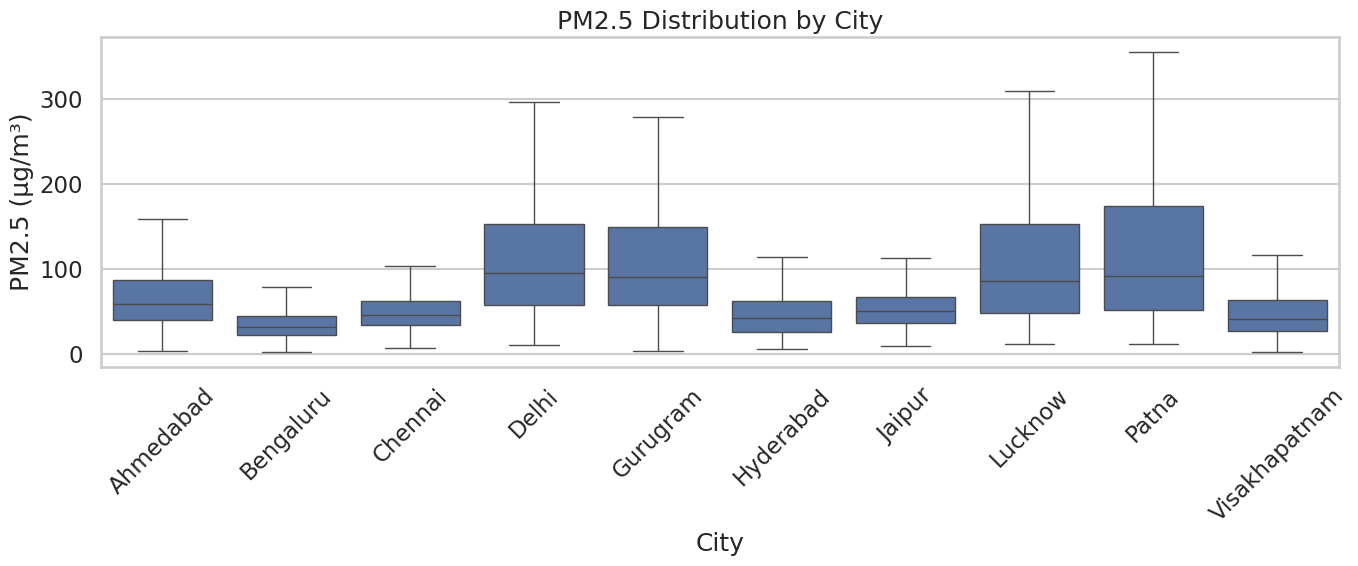

In [26]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_top_cities,
    x="City",
    y="PM2.5",
    showfliers=False
)

plt.title("PM2.5 Distribution by City")
plt.xlabel("City")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


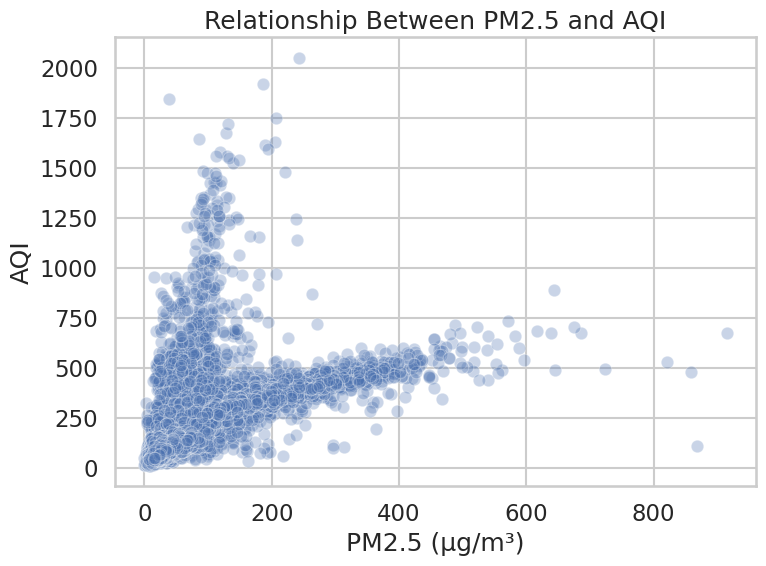

In [27]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df,
    x="PM2.5",
    y="AQI",
    alpha=0.3
)

plt.title("Relationship Between PM2.5 and AQI")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("AQI")
plt.tight_layout()
plt.show()


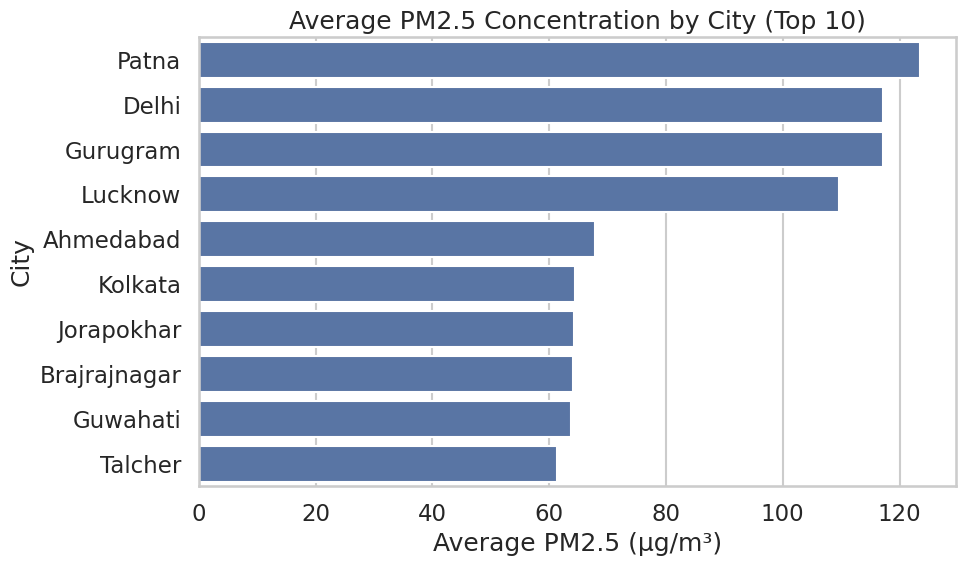

In [28]:
city_pm25 = (
    df.groupby("City")["PM2.5"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=city_pm25.values,
    y=city_pm25.index,
    orient="h"
)

plt.title("Average PM2.5 Concentration by City (Top 10)")
plt.xlabel("Average PM2.5 (µg/m³)")
plt.ylabel("City")
plt.tight_layout()
plt.show()


In [ ]:
## Key Insights (Exploratory Analysis)


In [ ]:
- Air Quality Index (AQI) shows strong temporal variability, with recurrent seasonal patterns and occasional extreme pollution events.
- PM2.5 concentrations present a highly right-skewed distribution, indicating frequent moderate pollution levels and rare but severe spikes.
- Significant differences in PM2.5 levels are observed across cities, suggesting strong location-dependent pollution dynamics.
- PM2.5 exhibits a clear positive relationship with AQI, reinforcing its role as a primary driver of air quality degradation.
- The observed variability and missing data patterns highlight the importance of careful preprocessing for any downstream modeling tasks.
